# Librerias

In [26]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Datos

In [27]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip \
    -O /tmp/databasesLoadData.zip

local_zip = '/tmp/databasesLoadData.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/databasesLoadData')
zip_ref.close()

train = pd.read_csv('/tmp/databasesLoadData/sign_mnist_train/sign_mnist_train_clean.csv')
test = pd.read_csv('/tmp/databasesLoadData/sign_mnist_test/sign_mnist_test.csv')

--2024-08-16 09:18:02--  https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.173.219, 142.250.78.91, 142.250.78.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.173.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71662510 (68M) [application/zip]
Saving to: ‘/tmp/databasesLoadData.zip’

/tmp/databasesLoadD 100%[===================>]  68.34M  21.7MB/s    in 3.1s    

2024-08-16 09:18:05 (21.7 MB/s) - ‘/tmp/databasesLoadData.zip’ saved [71662510/71662510]



/tmp/ipykernel_6057/2404292267.py:8: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,

# Preprocesado

In [28]:
train.shape

(27455, 785)

<Axes: xlabel='label', ylabel='count'>

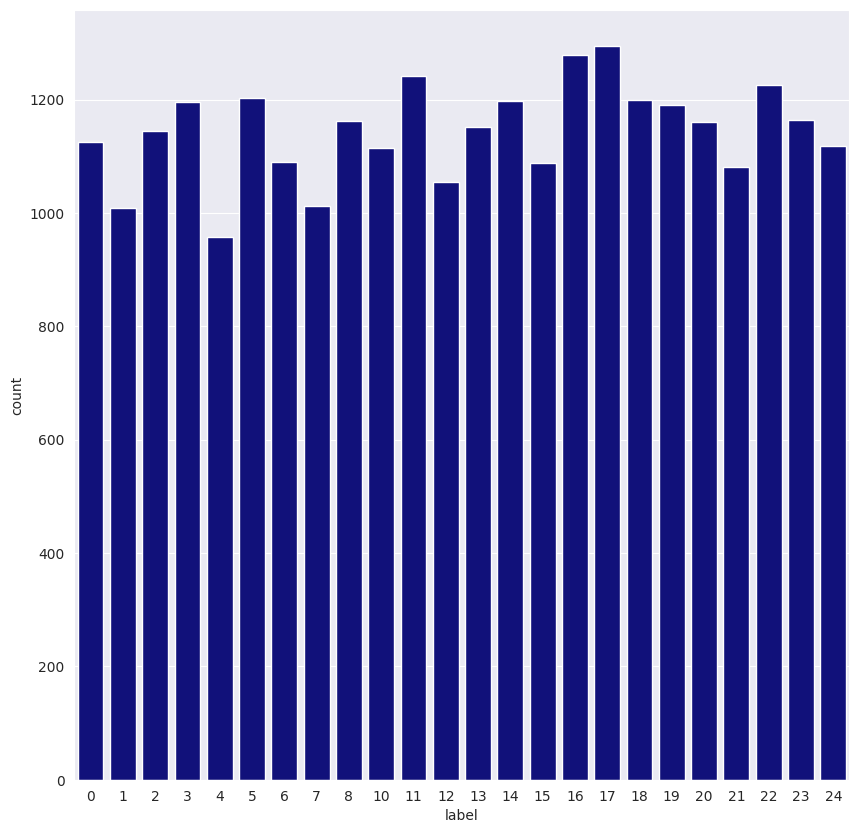

In [29]:
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
sns.countplot(data = train, x = 'label', color='darkblue')

In [30]:
y_train = train['label']
y_test = test['label']
del train['label']
del test['label']

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 784 entries, pixel1 to pixel784
dtypes: object(784)
memory usage: 164.2+ MB


In [32]:
train.dtypes

pixel1      object
pixel2      object
pixel3      object
pixel4      object
pixel5      object
             ...  
pixel780    object
pixel781    object
pixel782    object
pixel783    object
pixel784    object
Length: 784, dtype: object

In [33]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [34]:
train.isnull().sum().sum()

0

In [35]:
train[train.duplicated]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
802,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,...,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew
861,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,...,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew


Son imagenes completamente negras y con valores no numericos, no sirven. 

In [36]:
train = train.drop([317, 487, 595, 689, 802, 861], axis=0)

In [40]:
train[train['pixel1'] == 'fwefew']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
727,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,...,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew


In [41]:
train.drop([727], inplace=True)

In [46]:
train = train.astype('int') 
test = test.astype('int')

In [45]:
train.min().min(), train.max().max()

(0, 255)

In [47]:
train = train / 255
test = test / 255